## Función de correlación de dos puntos
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import scipy.stats as st
import random
import matplotlib.pyplot as plt
import math 
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
plt.style.use('classic')
%matplotlib inline

### Generamos distribución de puntos en x, y con forma de malla

Ingrese el número de puntos
100


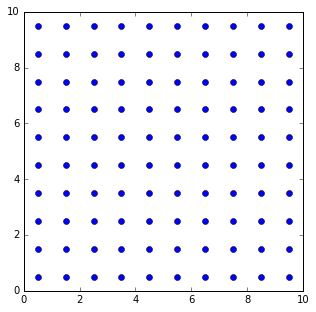

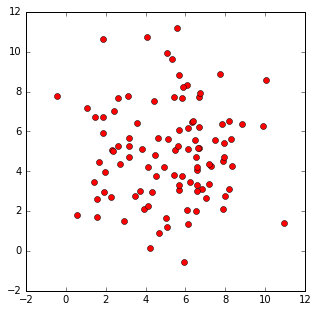

In [2]:
print("Ingrese el número de puntos")
n=int(input())
rho=1
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
x=np.zeros(n)
y=np.zeros(n)
x2=np.zeros(n)
y2=np.zeros(n)
k=0
while(k<np.size(x)/2):
    for i in range(int(dim)):
        for j in range(int(dim)):
                x[k]=(d/2.)+d*i
                y[k]=(d/2.)+d*j
                k=k+1
plt.figure(figsize=(5,5))
plt.plot(x,y, 'bo')
plt.show()
mu=dim/2
sigma=2.5
#for i in range(n):
#    random.seed(i)
#    x2[i]=random.random()*dim
#    y2[i]=random.random()*dim
x2=np.random.normal(mu,sigma,n)
y2=np.random.normal(mu,sigma,n)
plt.figure(figsize=(5,5))
plt.plot(x2,y2, 'ro')
plt.show()

In [3]:
def his(x,y, b):
    m = np.sqrt(n)
    d = np.zeros(n*(n-1)/2)
    gr = np.zeros(b)
    ran = m/b
    k=0
    for i in range(np.size(x)):
        for j in range(i+1,np.size(x)-1):
            r = np.uint16((np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2))/ran)
            if(r<b):
                gr[int(r)] = gr[int(r)]+1
    return gr

In [4]:
b=250
gr1=his(x,y,b)
gr2=his(x2,y2,b)

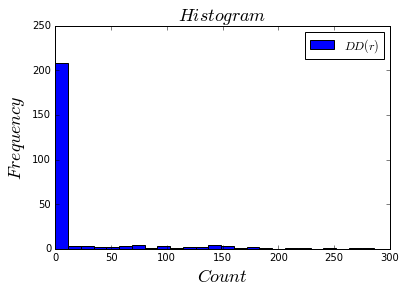

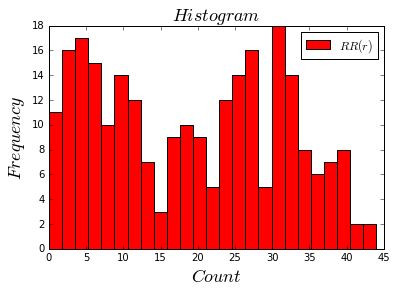

In [5]:
plt.hist(gr1, bins=25, edgecolor = 'black',  linewidth=1, color="blue",label = "$DD(r)$")
plt.title("$Histogram$",fontsize = 18)
plt.xlabel("$Count$",fontsize = 18)
plt.ylabel("$Frequency$",fontsize = 18)
plt.legend()
plt.show()

plt.hist(gr2, bins=25, edgecolor = 'black',  linewidth=1, color="red",label = "$RR(r)$")
plt.title("$Histogram$",fontsize = 18)
plt.xlabel("$Count$",fontsize = 18)
plt.ylabel("$Frequency$",fontsize = 18)
plt.legend()
plt.show()

In [6]:
def cor(gr1,gr2,i):
    global err
    if(gr2[i]!=0):
        err=(gr1[i]/gr2[i])-1
    else:
        err=-1
    return err

### Función de correlación de dos puntos

$\zeta (r)=\frac{DD(r)}{RR(r)}-1$

In [7]:
def func(gr1,gr2,dv1,dv2):
    m=np.size(gr1)
    dp=np.zeros(m)
    fc=np.zeros(m)
    global comp
    comp=0
    for i in range(m):
        fc[i]= cor(gr1,gr2,i)
        comp = comp+(1+cor(gr1,gr2,i))*dv1*dv2 
        dp[i]=comp
    return fc

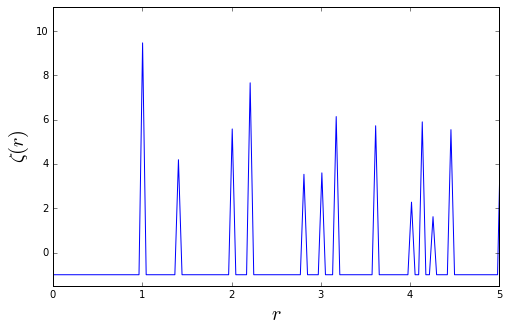

In [8]:
m = np.sqrt(n)
plt.figure(figsize=(8,5))
gdr = func(gr1,gr2,1,1)
xf=np.linspace(0,m,np.size(gdr))
plt.plot(xf,gdr,'b-')
plt.axis([0, 5, -1.5, max(gdr)*.3])
plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y
plt.show()